# Data Preprocessing

In [13]:
## import the necessary libraries and load the dataset into a Pandas dataframe:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

# LOADING THE DATASET

In [3]:
df = pd.read_csv("mushrooms.csv")

In [10]:
# Check for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
#encode the categorical variables using one-hot encoding:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df, columns=df.columns, drop_first=True)


# Exploratory Data Analysis

In [21]:
df_encoded.head

<bound method NDFrame.head of       class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           1            0            0            0            0   
1           0            0            0            0            0   
2           0            0            0            0            0   
3           1            0            0            0            0   
4           0            0            0            0            0   
...       ...          ...          ...          ...          ...   
8119        0            0            0            1            0   
8120        0            0            0            0            0   
8121        0            0            1            0            0   
8122        1            0            0            1            0   
8123        0            0            0            0            0   

      cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  \
0               1              0              1              0

In [22]:
df_encoded.tail

<bound method NDFrame.tail of       class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           1            0            0            0            0   
1           0            0            0            0            0   
2           0            0            0            0            0   
3           1            0            0            0            0   
4           0            0            0            0            0   
...       ...          ...          ...          ...          ...   
8119        0            0            0            1            0   
8120        0            0            0            0            0   
8121        0            0            1            0            0   
8122        1            0            0            1            0   
8123        0            0            0            0            0   

      cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  \
0               1              0              1              0

<Axes: xlabel='class', ylabel='count'>

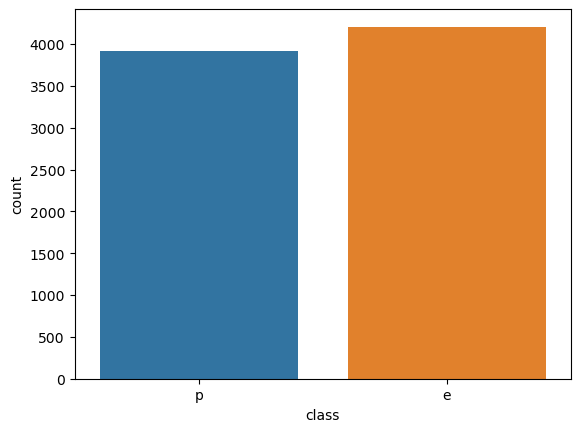

In [17]:
# Plot the distribution of the target variable
sns.countplot(x="class", data=df)

<Axes: >

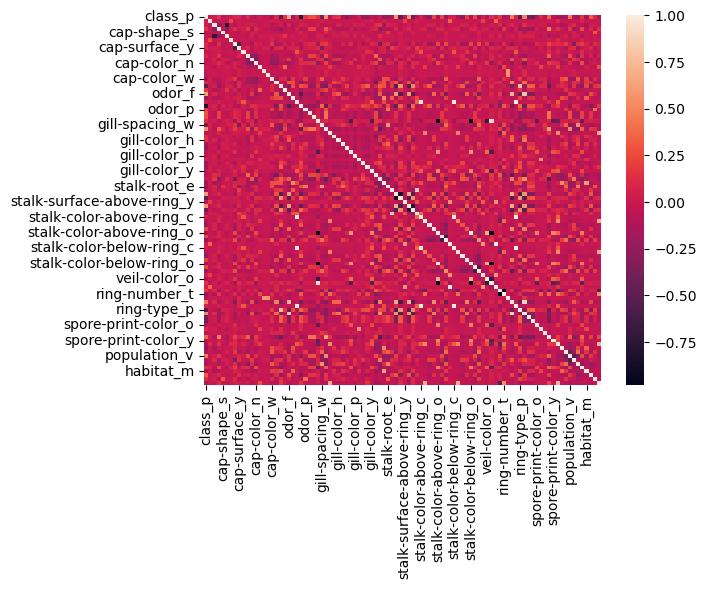

In [15]:

# Plot the correlation heatmap
corr = df_encoded.corr()
sns.heatmap(corr)


# Feature Selection

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Split the data into X and y
X = df_encoded.drop("class_p", axis=1)
y = df_encoded["class_p"]

# Create the logistic regression model
logreg = LogisticRegression()

# Perform feature selection using RFE
rfe = RFE(logreg, n_features_to_select=10)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]


# Model Training and Evaluation

In [19]:
from sklearn.model_selection import cross_val_score

# Split the data into X and y using the selected features
X_selected = df_encoded[selected_features]
y = df_encoded["class_p"]

# Create the logistic regression model
logreg = LogisticRegression()

# Perform cross-validation
scores = cross_val_score(logreg, X_selected, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))


Cross-validation scores: [0.92123077 0.99630769 0.94953846 1.         0.94211823]
Mean cross-validation score: 0.9618390299355817


# Characteristics of Safe Mushrooms

In [20]:
print("Selected features:", selected_features)


Selected features: Index(['odor_c', 'odor_f', 'odor_n', 'odor_p', 'gill-size_n',
       'stalk-color-below-ring_y', 'spore-print-color_k',
       'spore-print-color_n', 'spore-print-color_r', 'spore-print-color_u'],
      dtype='object')
